In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
nrj_FRANCE = pd.read_csv(r'data/fr.csv', sep=',', header=0)

In [ ]:
# Create dictionnary for months
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'Spetember',
    10 : 'October',
    11 : ''
}

In [6]:
nrj_FRANCE.head(10)

,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0


In [9]:
nrj_FRANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   48870 non-null  object 
 1   end     48870 non-null  object 
 2   load    48870 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [17]:
for i in ['start', 'end']:
    nrj_FRANCE[i] = pd.to_datetime(nrj_FRANCE[i])
print(nrj_FRANCE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   start   48870 non-null  datetime64[ns, UTC]
 1   end     48870 non-null  datetime64[ns, UTC]
 2   load    48870 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 1.1 MB
None


In [28]:
nrj_FRANCE['Duration'] = nrj_FRANCE['end']-nrj_FRANCE['start']
print(nrj_FRANCE['Duration'].mean(), nrj_FRANCE['Duration'].median())
# All are equal to 1 hour

0 days 01:00:00 0 days 01:00:00


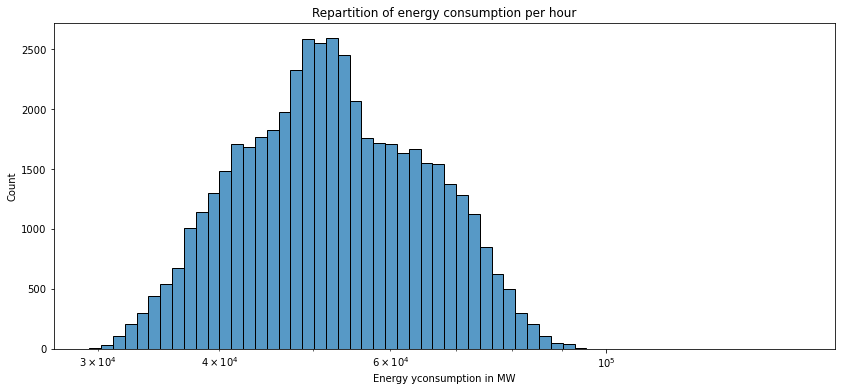

In [32]:
plt.figure(figsize=(14, 6))

sns.histplot(nrj_FRANCE, x='load', bins= 60, log_scale=True)
plt.title("Repartition of energy consumption per hour")
plt.xlabel('Energy yconsumption in MW')
plt.ylabel('Count')

plt.show()

In [35]:
# Sum over months 
# Define Month and Year depending on the Start time

nrj_FRANCE['month'] = pd.DatetimeIndex(nrj_FRANCE['start']).month
nrj_FRANCE['year'] = pd.DatetimeIndex(nrj_FRANCE['start']).year

display(nrj_FRANCE.head(10))

,start,end,load,Duration,month,year
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0,0 days 01:00:00,1,2015
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0,0 days 01:00:00,1,2015
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0,0 days 01:00:00,1,2015
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0,0 days 01:00:00,1,2015
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0,0 days 01:00:00,1,2015
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0,0 days 01:00:00,1,2015
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0,0 days 01:00:00,1,2015
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0,0 days 01:00:00,1,2015
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0,0 days 01:00:00,1,2015
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0,0 days 01:00:00,1,2015


In [51]:
nrj_FRANCE_month = pd.DataFrame(nrj_FRANCE.groupby(['year', 'month']).sum())

nrj_FRANCE_month = nrj_FRANCE_month.reset_index()
display(nrj_FRANCE_month.head(5))

nrj_FRANCE_month = nrj_FRANCE_month.pivot(index = 'month', columns = 'year', values='load')
display(nrj_FRANCE_month)

,year,month,load
0,2015,1,51725199.0
1,2015,2,47963647.0
2,2015,3,45104582.0
3,2015,4,36438366.0
4,2015,5,33590317.0


year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,51725199.0,49215126.0,56972849.0,47677046.0,53309882.0,48982627.0
2,47963647.0,45557783.0,42500793.0,49402028.0,43540349.0,42367373.0
3,45104582.0,46617335.0,42033655.0,47545979.0,42455425.0,40941968.0
4,36438366.0,38564314.0,36411014.0,35674724.0,37497012.0,30534897.0
5,33590317.0,34253383.0,34670087.0,33486745.0,35252223.0,30464502.0
6,32969829.0,32453840.0,33325754.0,32029026.0,32350412.0,30360224.0
7,34666370.0,33527240.0,33773638.0,34317609.0,34146521.0,32828106.0
8,31381232.0,31951701.0,31969347.0,31802033.0,31315448.0,NaN
9,33014999.0,33084516.0,33393101.0,32448346.0,32030576.0,NaN


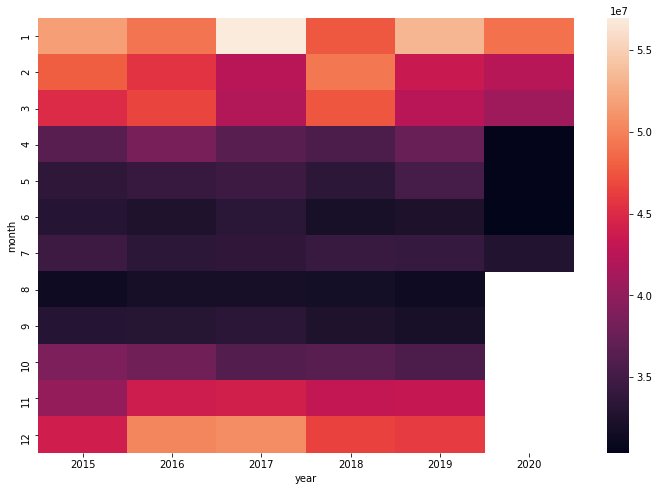

In [52]:
plt.figure(figsize=(12, 8))

sns.heatmap(nrj_FRANCE_month)

plt.show()